## Maximum likelihood

**A toy example** - we have a sample of $n$ coin flips (represented by the number of heads we got), but we don't know what is the "fairness" of the coin, described by the parameter $p$. This parameter describes how likely it is to observe a head in a single coinflip.

The goal is: given a sample of coin flips, estimate the unknown parameter $p$.

In [1]:
# the true, unknown "fairness" of the coin
x <- 0.2

In [2]:
# total number of coin-flips
n <- 200

In [9]:
# observed data - the number of heads after n coinflips
(heads <- sum(rbinom(n, 1, x)))

[1] 45

#### Finding the MLE using a "grid search" procedure (testing different values of $p$ individually)

In [10]:
# a 1D "grid" of parameter values to explore
param <- seq(0, 1, length.out=100)

# likelihoods of the "grid points" given the observed number of heads
likelihoods <- sapply(param, function(p) { dbinom(heads, n, p) })

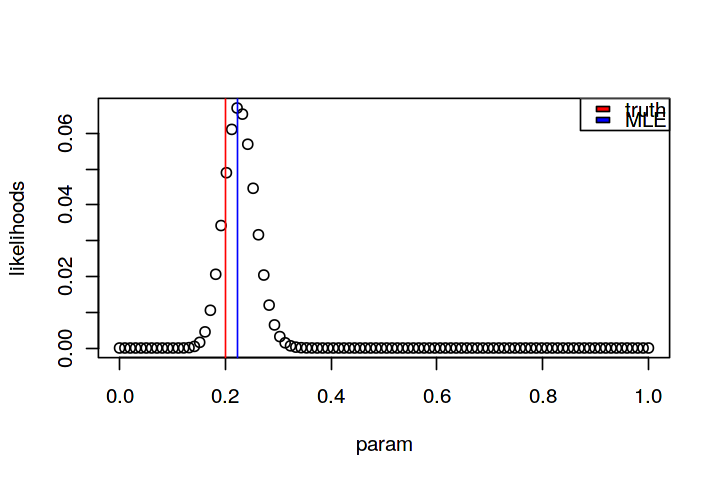

In [11]:
# plot the likelihood function and mark the MLE of the coin fairness
options(repr.plot.width=6, repr.plot.height=4)

plot(param, likelihoods)
abline(v=param[which.max(likelihoods)], col="blue")
abline(v=x, col="red")
legend("topright", legend=c("truth", "MLE"), fill=c("red", "blue"))

#### Finding the MLE using the optimization algorithm:

We will use the `optimization` function which searches the interval for a minimum of the function f with respect to its first argument.

In [12]:
# likelihood function to minimize
negLL <- function(data, param) {
    -dbinom(data, n, param, log=TRUE)
}

In [13]:
res <- optimize(negLL, interval=c(0, 1), data=heads)

MLE of the parameter $p$:

In [14]:
res$minimum

[1] 0.2249889